In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk as nlp
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_fake["target"] = 0
df_true["target"] = 1
df_fake = df_fake.drop(["title","subject","date"],axis = 1)
df_true = df_true.drop(["title","subject","date"],axis = 1)
df = pd.concat([df_fake,df_true],axis = 0)
df = df.sample(frac=1)
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)

In [3]:
import re
import string
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


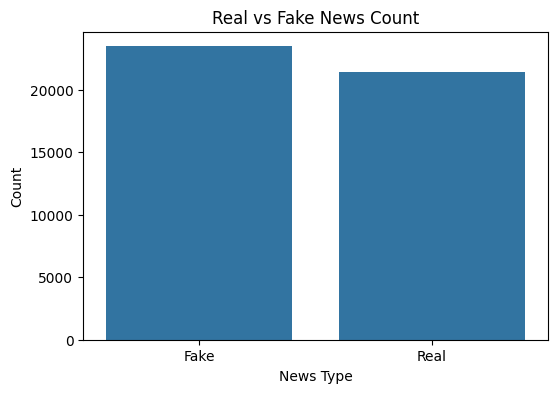

In [4]:
df["text"] = df["text"].apply(wordopt)
#class distribution of fake vs real news
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Real vs Fake News Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

In [5]:
#Analysis of news type csv files: There is a much larger amount of fake news headlines to real news headlines. This could create conflicts with our model as it is being trained on datasets with many more fake news headlines to real news headlines.

In [6]:
X = df["text"]
Y = df["target"]
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.75)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,Y_train)
print("The Accuracy of the Logistic Regression Model is {}".format(lr.score(xv_test,y_test)))
print(classification_report(y_test,lr.predict(xv_test)))

The Accuracy of the Logistic Regression Model is 0.972708914889826
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17667
           1       0.97      0.98      0.97     16007

    accuracy                           0.97     33674
   macro avg       0.97      0.97      0.97     33674
weighted avg       0.97      0.97      0.97     33674



In [15]:
data = pd.read_csv('News.csv',index_col=0)
data = data.drop(["title", "subject","date"], axis = 1)
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)
data["text"] = data["text"].replace("(Reuters)","",regex=True)
data["text"] = data["text"].apply(wordopt)
data.dropna(inplace=True)

sample_test = data.sample(200)
sample_test.reset_index(inplace=True)

sample_x = data["text"]
sample_y = data["class"]

sample_xv = vectorization.transform(sample_x)

print("The Accuracy of the Logistic Regression Model on dataset News.csv is {}".format(lr.score(sample_xv,sample_y)))

The Accuracy of the Logistic Regression Model on dataset News.csv is 0.9753333778579221


In [7]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(dtc.score(xv_test,y_test)))
print(classification_report(y_test,dtc.predict(xv_test)))

#The logistic regression model has a much better accuracy rate than the Decision tree model. We will use the logistic regression model over the decision tree classifier model.

The Accuracy of the Decision Tree Classifier Model is 0.9073469145334679
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     17667
           1       0.91      0.90      0.90     16007

    accuracy                           0.91     33674
   macro avg       0.91      0.91      0.91     33674
weighted avg       0.91      0.91      0.91     33674



In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gclf = GradientBoostingClassifier()
gclf.fit(xv_train,Y_train)
print("The Accuracy of the Gradient Boosting Classifier Model is {}".format(gclf.score(xv_test,y_test)))
print(classification_report(y_test,gclf.predict(xv_test)))

The Accuracy of the Gradient Boosting Classifier Model is 0.9597909366276652
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17667
           1       0.95      0.96      0.96     16007

    accuracy                           0.96     33674
   macro avg       0.96      0.96      0.96     33674
weighted avg       0.96      0.96      0.96     33674



In [9]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(xv_train,Y_train)
print("The Accuracy of the Random Forest Classifier Model is {}".format(rclf.score(xv_test,y_test)))
print(classification_report(y_test,rclf.predict(xv_test)))

The Accuracy of the Random Forest Classifier Model is 0.9659381124903487
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17667
           1       0.96      0.97      0.96     16007

    accuracy                           0.97     33674
   macro avg       0.97      0.97      0.97     33674
weighted avg       0.97      0.97      0.97     33674



In [10]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dtc.predict(new_xv_test)
    pred_GBC = gclf.predict(new_xv_test)
    pred_RFC = rclf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [11]:
test_cases = [
    "Government launches new healthcare initiative.",
    "Scientists claim to have found life on Mars!",
    "This article is a hoax to trick you."
]

for article in test_cases:
    manual_testing(article)




LR Prediction: Not Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [12]:
#Web Scraping From Articles Online
import requests
from bs4 import BeautifulSoup

def scrape_reuters():
    url = "https://www.reuters.com"
    headlines = []
    try:
        res = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        soup = BeautifulSoup(res.content, 'html.parser')
        for tag in soup.find_all(['h1', 'h2', 'h3']):
            text = tag.get_text(strip=True)
            if len(text) > 40 and len(text.split()) > 5:
                headlines.append(text)
    except Exception as e:
        print(f"[Reuters] Error: {e}")
    return headlines[:5]

def scrape_cnn():
    url = "https://www.cnn.com"
    headlines = []
    try:
        res = requests.get(url)
        soup = BeautifulSoup(res.content, "html.parser")
        for tag in soup.find_all(['h2', 'span']):
            text = tag.get_text(strip=True)
            if len(text) > 40 and len(text.split()) > 5:
                headlines.append(text)
    except Exception as e:
        print(f"[CNN] Error: {e}")
    return headlines[:5]

def scrape_bbc():
    url = "https://www.bbc.com"
    headlines = []
    try:
        res = requests.get(url)
        soup = BeautifulSoup(res.content, "html.parser")
        for tag in soup.find_all(['h3', 'h2']):
            text = tag.get_text(strip=True)
            if len(text) > 40 and len(text.split()) > 5:
                headlines.append(text)
    except Exception as e:
        print(f"[BBC] Error: {e}")
    return headlines[:5]
def test_scraped_headlines():
    sources = {
        "Reuters": scrape_reuters(),
        "CNN": scrape_cnn(),
        "BBC": scrape_bbc()
    }

    for source, headlines in sources.items():
        print(f"\n==== {source} Headlines ====")
        for idx, headline in enumerate(headlines, 1):
            print(f"\n{idx}. {headline}")
            manual_testing(headline)
test_scraped_headlines()



==== Reuters Headlines ====

==== CNN Headlines ====

1. Cardinals are in lockdown to elect a new pope


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News

2. The doors of the Sistine Chapel are slammed shut as the conclave, shrouded in secrecy and rituals, begins


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News

3. Who will be the next pope? Here are the frontrunners


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News

4. Why Pizzaballa, Jerusalem‚Äôs first cardinal and an advocate for peace, could be a long-shot contender for pope


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News

5. View of chimney that will signal new pope


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News

==== BBC Headlines ====

1. Wha

In [ ]:
#distribution of text lengths by class (real vs fake)
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', hue='target', bins=50, kde=True)
plt.title('Distribution of Text Lengths by Class')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.legend(['Fake', 'Real'])
plt.show()

from wordcloud import WordCloud

# Combine all words by class
real_words = ' '.join(df[df['target'] == 1]['text'])
fake_words = ' '.join(df[df['target'] == 0]['text'])

# WordClouds
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(fake_words)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Real News WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News WordCloud')
plt.axis('off')

plt.tight_layout()
plt.show()

#Top N words by frequency
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top_words = get_top_n_words(df['text'], 15)
top_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_df)
plt.title('Top 15 Most Frequent Words')
plt.show()


Prediction: Fake News
Probability it's real: 0.3187
Probability it's fake: 0.6813

Top words indicating REAL news:
this: -5.0178
via: -4.7658
is: -4.5595
that: -4.0753
you: -3.6038
just: -3.3405
hillary: -3.1281
image: -3.0947
obama: -2.9083
gop: -2.7777

Top words indicating FAKE news:
said: 16.6965
on: 7.8396
in: 5.0166
washington: 4.6259
us: 4.6126
wednesday: 4.0467
minister: 3.7681
thursday: 3.7602
tuesday: 3.5141
republican: 3.3977


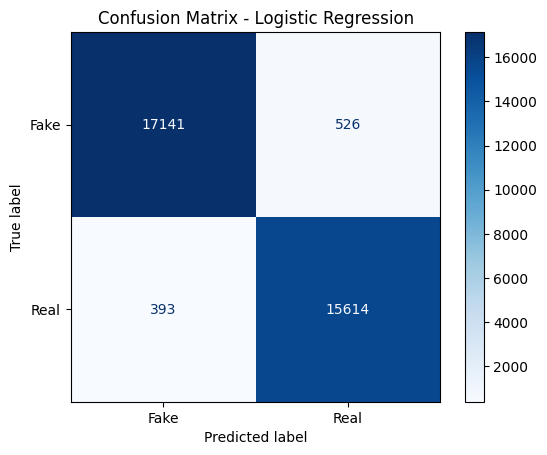


--- False Negatives (Real predicted as Fake) ---

  a blackout of television cameras in the us house representatives during the democrats’ gun control sitin may have spurred public interest in the protest as it forced the demonstrators to use social media to broadcast their message democrats leapt on facebook live and twitter’s periscope after the cameras controlled by the house went dark wednesday when presiding house officer and republican representative ted poe declared the chamber not in order during the protest as democrats took to alterna
------------------------------------------------------------

after going through a week reminiscent of napoleon’s at waterloo republican presidential nominee donald trump will likely claim that indiana governor mike pence’s performance in tuesday’s vicepresidential debate gave a boost to their campaign  that would be overstating it  the debate probably changed few votes in the  presidential election the question is whether it will change any v

In [14]:
# Diagnostic script for Fake News Detection

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. CONFIDENCE SCORES
def show_prediction_confidence(news):
    processed_text = wordopt(news)
    transformed_text = vectorization.transform([processed_text])
    probs = lr.predict_proba(transformed_text)
    print(f"\nPrediction: {output_lable(lr.predict(transformed_text)[0])}")
    print(f"Probability it's real: {probs[0][1]:.4f}")
    print(f"Probability it's fake: {probs[0][0]:.4f}")

# 2. FEATURE IMPORTANCE
def print_top_features():
    feature_names = vectorization.get_feature_names_out()
    coefficients = lr.coef_[0]
    top_fake_idx = np.argsort(coefficients)[-10:]
    top_real_idx = np.argsort(coefficients)[:10]

    print("\nTop words indicating REAL news:")
    for i in top_real_idx:
        print(f"{feature_names[i]}: {coefficients[i]:.4f}")

    print("\nTop words indicating FAKE news:")
    for i in reversed(top_fake_idx):
        print(f"{feature_names[i]}: {coefficients[i]:.4f}")

# 3. CONFUSION MATRIX
def plot_confusion_matrix():
    y_pred = lr.predict(xv_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix - Logistic Regression")
    plt.show()

# 4. MISCLASSIFIED EXAMPLES
def show_misclassified_examples():
    y_pred = lr.predict(xv_test)
    false_negatives = x_test[(y_test == 1) & (y_pred == 0)]  # Real predicted as Fake
    false_positives = x_test[(y_test == 0) & (y_pred == 1)]  # Fake predicted as Real

    print("\n--- False Negatives (Real predicted as Fake) ---")
    for article in false_negatives.sample(3, random_state=1):
        print(f"\n{article[:500]}\n{'-'*60}")

    print("\n--- False Positives (Fake predicted as Real) ---")
    for article in false_positives.sample(3, random_state=1):
        print(f"\n{article[:500]}\n{'-'*60}")

# 5. FULL DIAGNOSTIC FUNCTION
def run_full_diagnostics(news_input):
    show_prediction_confidence(news_input)
    print_top_features()
    plot_confusion_matrix()
    show_misclassified_examples()

# Example usage:
run_full_diagnostics("NASA confirms discovery of water on the sunlit surface of the Moon")
